# Entregável 3 de Visão Computacional e Robótica - PARTE 1


**Aluno 1**:

**Aluno 2**:

**Link para o vídeo do passo 5**:

In [28]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

### Carregar as imagens

A seguir, vocês podem alterar qual imagem de teste esta sendo utilizada no notebook, o codigo deve funcionar em todas as 3.


In [29]:
img1 = cv2.imread("img/frame01.jpg")
img2 = cv2.imread("img/frame02.jpg")
img3 = cv2.imread("img/frame03.jpg") # Mais dificil

img = img1.copy() # Trocar o numero da imagem.

Ouça a explicação do professor sobre detecção de retas em imagens.
Nas tarefas a seguir, você irá usar um estimador linear de mínimos quadrados.

## Passo 6 - Ponto de Fuga

Robôs que trabalham dentro de prédios precisam saber seguir corredores.

Uma das maneiras de fazer isso é o robô alinhar o centro de sua câmera ao ponto de fuga do corredor, para que sua trajetória seja aproximadamente paralela às paredes do mesmo.


O ponto de fuga é aquele para o qual as retas paralelas parecem convergir

Dada a seguinte imagem de um corredor:

![Imagem do corredor](fig/ponto_fuga.png)

Podemos traçar as linhas geradas pela perspectiva, seu ponto de encontro será o ponto de fuga.



### Revisão: reta passando por dois pontos

![Encontro de duas retas](fig/retas.png)


Seja o ponto $A:(a_x, a_y)$ e o ponto $B:(b_x, b_y)$

Queremos encontrar uma reta $r: y = mx + h$ que passa por $A$ e $B$, em que $m$ é o *coeficiente angular* e $h$ é o intercepto ou coeficiente linear da reta.

Temos que:

$m = \frac{\Delta_y}{\Delta_x} = \frac{b_y - a_y}{b_x - a_x}$

Uma vez encontrado o valor de $m$, a substituição a seguir permite encontrar a equação da reta:

$m = \frac{y - a_y}{x - a_x}$

$mx - ma_x = y - a_y$

$mx = y - a_y + ma_x$

$y = mx -ma_x + a_y$

$h = a_y - ma_x$


$y = mx - ma_x + a_y$

### Interseção de duas retas

Temos que na interseção as duas retas se encontram num ponto $(x_i, y_i)$

Sejam as retas $r1: y = m1x + h1$ e $r2: y = m2x + h2$

Vamos encontrar o ponto $x_i$ em que os valores de $y_i$ serão iguais:

$m1x_i + h1 = m2x_i + h2$

$(m1 - m2)x_i = h2 - h1$

$x_i = \frac{h2 - h1}{m1 - m2}$

$y_i = m1x_i + h1$

**Dados de teste:**

Caso precise testar seu código, você pode conferir com estes valores. As retas definidas por pontos $r1: (P_1, P_2)$ e $r2: (Q_1, Q_2)$, para os valores:

```python

p1 = (3.0, 2.5)
p2 = (4.0, 0.6)
q1 = (1.0, 2.4)
q2 = (0.6, 1.1)
```

Encontram-se no ponto `(1.7572 4.8611)`


Pede-se: 

* A partir do ponto para onde convergem as linhas do corredor, marque o ponto de fuga no vídeo.  Você precisa mostrar as retas que vão convergir.


**Sugestão:** 

A partir do coeficiente angular, selecionar uma reta mais à esquerda e uma mais à direita para encontrar a interseção.

Lembre-se de que na OpenCV o eixo y fica **para baixo**, por isso os coeficientes angulares se comportam como na figura abaixo:

![Valores de coeficiente angular](fig/coeficientes_m.png)

Lembre-se de que, no espaço de cores HSV, o vermelho se encontra no início e no fim da escala do componente H. Se você estiver filtrando vermelho em um só dos extremos pode não ter bons resultados

In [34]:
import biblioteca2

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca2) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca2)

### Passo 6.1 - Segmentar Faixas Brancas

(660, 880, 3)


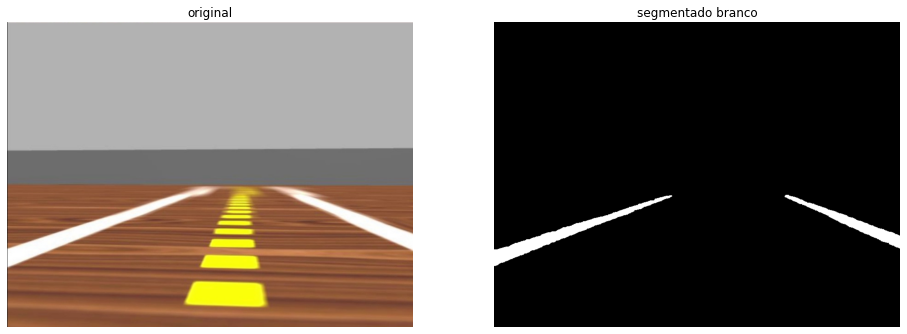

In [35]:
img = img1.copy()[30:-30,200:-200] # Remover barra de tarefa da imagem
print(img.shape)

# Segmenta Linha Branca
mask = biblioteca2.segmenta_linha_branca(img)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="gray")
ax[0].set_title('original')
ax[1].set_title('segmentado branco')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as faixas brancas segmentadas

### Passo 6.2 -  Calcular Linha
Usando `cv2.HoughLinesP()` calcule apenas UMA linha que passe em cada uma das faixas

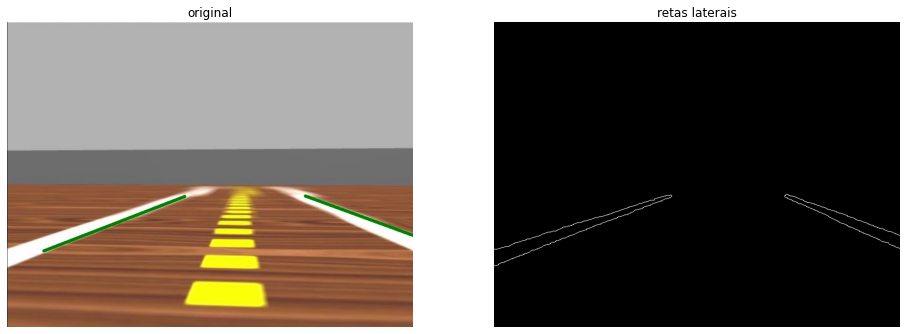

In [36]:
linhas = biblioteca2.estimar_linha_nas_faixas(img, mask)

# Plot
f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('retas laterais')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# APENAS uma linha magenta em cada faixa branca

### Passo 6.3 - Calcular Equações da Linha nas Faixas
Com os pontos de cada faixa, calcule a equação de cada reta

In [37]:
equacoes = biblioteca2.calcular_equacao_das_retas(linhas)

for m, h in equacoes:
    print("Equacao: y = {m}x + {c}".format(m=m,c=h))

# Saida Esperada:
# Equacao: y = -0.3643410852713174x + 519.0
# Equacao: y = 0.38152610441767054x + 131.63855421686765

Equacao: y = 0.3648068669527897x + 140.33476394849785
Equacao: y = -0.38562091503267976x + 525.4640522875817


### Passo 6.4 - Calcular Ponto de Fuga

Calcule o Ponto de Fuga da imagem, ou seja, o ponto de encontro entre as linhas.

Ponto de Fuga: (513.2129934210526, 327.5583881578947)


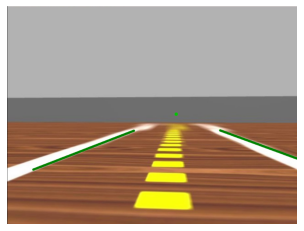

In [38]:
img, pontof = biblioteca2.calcular_ponto_de_fuga(img, equacoes)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print("Ponto de Fuga: " + str(pontof))
# Saida Esperada (aproximado):
# Ponto de Fuga: (519, 329)